## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [22]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [23]:
# Load the dataset
data = pd.read_csv('EasyVisa.csv')


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [70]:
print("First 5 rows of the dataset:")
print(data.head(5))
print ("\n\n")

print("Last 5 rows of the dataset:")
print(data.tail(5))


First 5 rows of the dataset:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y  

#### Understand the shape of the dataset

In [ ]:
print (data.info())
print("Shape of the dataset,  total rows {0} and columns {1} ".format(data.shape[0], data.shape[1]))  # (rows, columns)

Shape of the dataset,  total rows 25480 and columns 12 


#### Check the data types of the columns for the dataset

In [86]:
# Data sanity checks 

# Check for categorical and numerical variables and count of null values in each column

print ("\nData types and null values in each column:\n")  
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Column: {col} is a categorical variable, and there are {data[col].isnull().sum()} null values.\n")
        print(f"Unique values in {col}: {data[col].unique()}\n")
    elif data[col].dtype in ['int64', 'float64']:
        print(f"Column: {col} is a numerical variable, and there are {data[col].isnull().sum()} null values.\n")

print ("\n")

# Check for duplicate rows
print("\nChecking for duplicate rows in the dataset:")
duplicate_rows = data.duplicated()
num_duplicate_rows = duplicate_rows.sum()
#print(f"Number of duplicate rows: {num_duplicate_rows}")
if num_duplicate_rows > 0:
    print("Duplicate rows found:")
    print(data[duplicate_rows])
    print("Removing duplicate rows.")
    data = data.drop_duplicates()
    print(f"New shape of the dataset after removing duplicates: {data.shape}")  
else:
    print("No duplicate rows found.")   

print ("\n")





Data types and null values in each column:

Column: case_id is a categorical variable, and there are 0 null values.

Unique values in case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']

Column: continent is a categorical variable, and there are 0 null values.

Unique values in continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']

Column: education_of_employee is a categorical variable, and there are 0 null values.

Unique values in education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']

Column: has_job_experience is a categorical variable, and there are 0 null values.

Unique values in has_job_experience: ['N' 'Y']

Column: requires_job_training is a categorical variable, and there are 0 null values.

Unique values in requires_job_training: ['N' 'Y']

Column: no_of_employees is a numerical variable, and there are 0 null values.

Column: yr_of_estab is a numerical variable, and there are 0 null values.

Column: r

**Observations after sanity checks**
 - There are 3 numerical columns and the rest as 'Object' data types
 -  Total rows 25480 and columns 12
 - There are NO duplicate rows
 - There are NO NULL values in any of the columns 
---

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [89]:
data.describe(include='all').T  # statistical summary of numerical columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Sanity Check - Observations **
- case_id -->  count and unique are the same which indicates that its a identifier or ID, this column can be removed as it's not useful for analysis
- continent --> There are 6 unique values, shows where the applicats are from 
- education_of_employee --> There are 4 unique values
- has_job_experience --> data is aplit almost evenly 
- requires_job_training --> most applicants dont need job training
- no_of_employees --> min value is a negative value, there cannot be less than 0 employees in a company, this indicates that there are some bad data with less than 0 employees, the bad data needs to be removed
- yr_of_estab --> min value is 1800, there are applicants for companies older than 200 years 
- region_of_employment --> 5 unique regions 
- prevailing_wage --> comparing 25% and max , the data appears have a wide spread
- unit_of_wage --> 4 unique values
- full_time_position --> full time job is more preferred 
- case_status --> This is the dependent variable, applicants certifies is slight more



#### Fixing the negative values in number of employees columns

In [73]:
#check column min value is less than 0 
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        if (data[col].min() < 0):
            num_negative_values = (data[col] < 0).sum()
            print(f"Column: {col} has {num_negative_values} negative values.")
        else:
            print(f"Column: {col} has no negative values.")


# "no_of_employees" has negative values, busines cannot have negative employees, so we will remove those rows
data_cleaned = data[data['no_of_employees'] >= 0]
print(f"Shape of the dataset after removing rows with negative 'no_of_employees': {data_cleaned.shape}\n")
print("# statistical summary of numerical columns after cleaning ")
print(data_cleaned.describe().T)  # statistical summary of numerical columns after cleaning 


Column: no_of_employees has 33 negative values.
Column: yr_of_estab has no negative values.
Column: prevailing_wage has no negative values.
Shape of the dataset after removing rows with negative 'no_of_employees': (25447, 12)

# statistical summary of numerical columns after cleaning 
                   count          mean           std        min       25%  \
no_of_employees  25447.0   5674.415334  22891.842245    12.0000   1025.00   
yr_of_estab      25447.0   1979.394506     42.385932  1800.0000   1976.00   
prevailing_wage  25447.0  74468.281479  52822.177370     2.1367  34039.21   

                     50%         75%        max  
no_of_employees   2112.0    3506.500  602069.00  
yr_of_estab       1997.0    2005.000    2016.00  
prevailing_wage  70312.5  107739.505  319210.27  


#### Let's check the count of each unique category in each of the categorical variables

In [74]:
#unique values in categorical columns
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        print(f"Unique values in {col}: {data_cleaned[col].unique()}")
        print(f"Value counts in {col}: {data_cleaned[col].value_counts()}\n")

print("Unique values and value counts displayed for all categorical columns." \
      "There are NO inconsistent Labels." \
)


Unique values in case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
Value counts in case_id: case_id
EZYV01       1
EZYV16994    1
EZYV16992    1
EZYV16991    1
EZYV16990    1
            ..
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV8488     1
EZYV25480    1
Name: count, Length: 25447, dtype: int64

Unique values in continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Value counts in continent: continent
Asia             16840
Europe            3727
North America     3287
South America      851
Africa             550
Oceania            192
Name: count, dtype: int64

Unique values in education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
Value counts in education_of_employee: education_of_employee
Bachelor's     10220
Master's        9622
High School     3416
Doctorate       2189
Name: count, dtype: int64

Unique values in has_job_experience: ['N' 'Y']
Value counts in has_job_experience: has_job_experience


### Univariate Analysis

Distribution of numerical column: no_of_employees


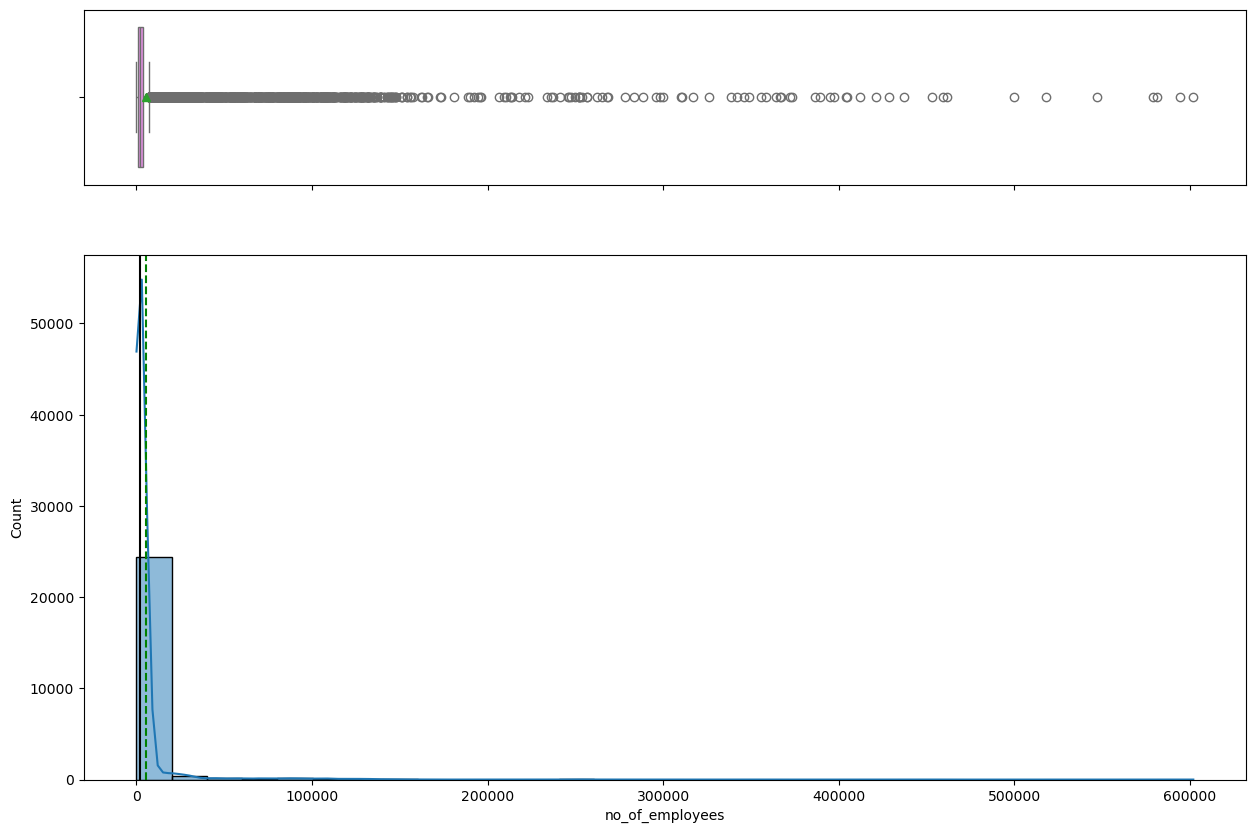

Distribution of numerical column: yr_of_estab


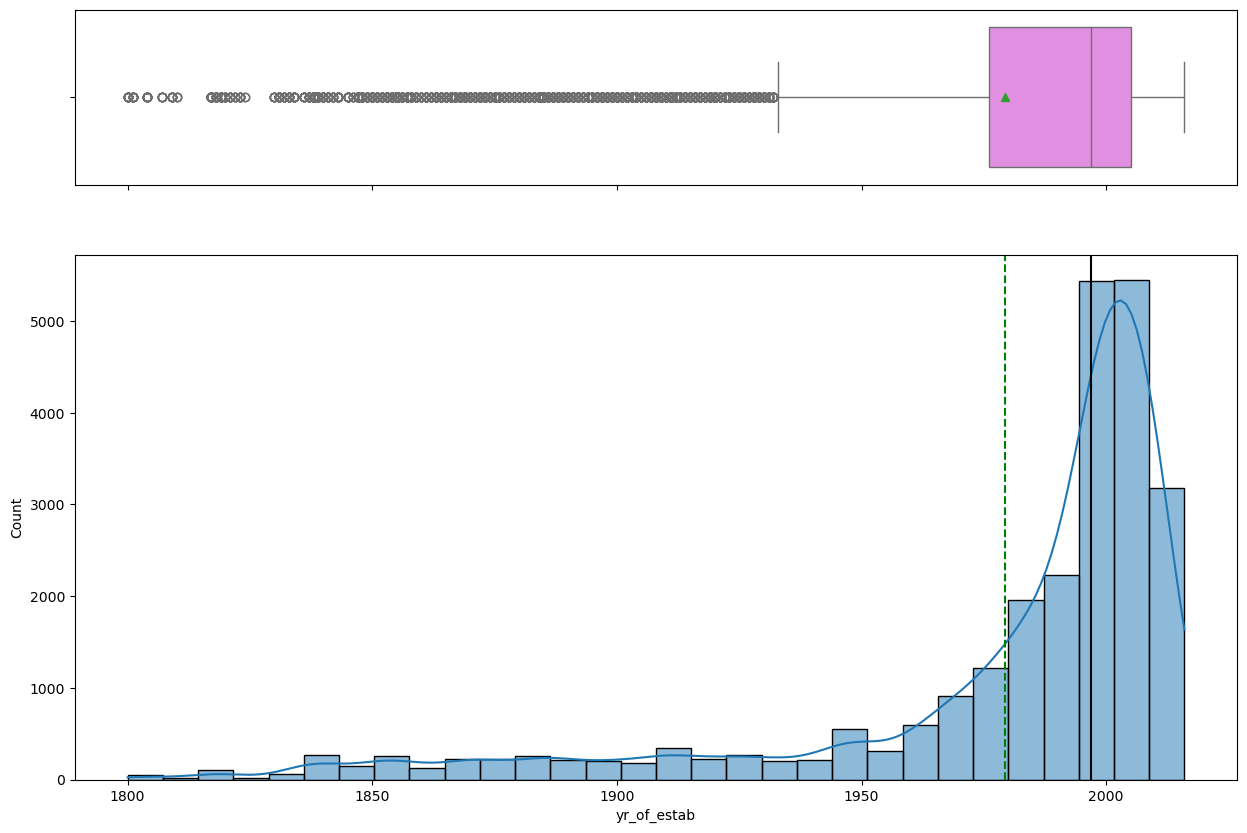

Distribution of numerical column: prevailing_wage


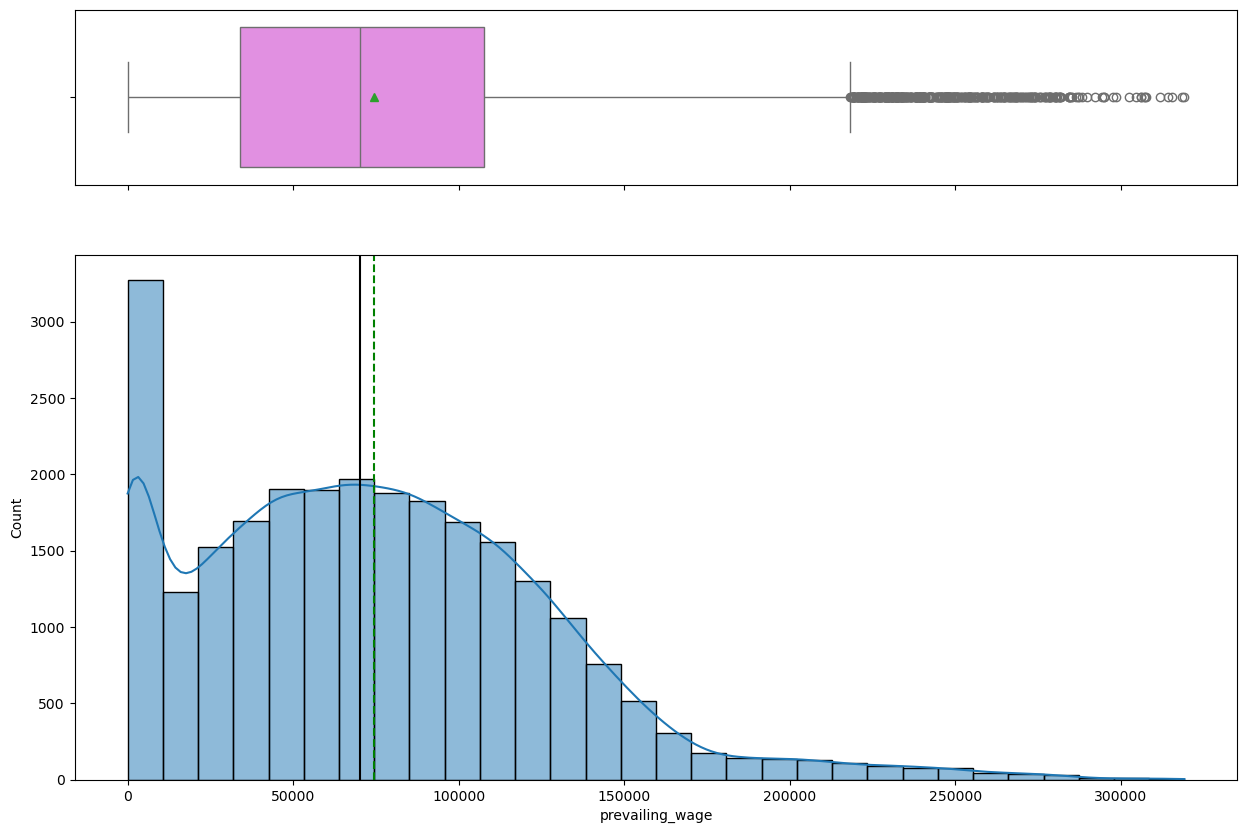

Observations for numerical columns:
1. 'no_of_employees' has a few negative values which have been removed earlier.  
   - There some outliers on the higher side, indicating some companies have a very high number of employees.
2. 'year_founded' has some outliers on the lower side (left skewed), indicating some companies have existed for over a century.  
   - There are high number of companies founded in the last 75 years.
3. 'prevailing_wage' has few high wages which makes the data right skewed.
   - Most of the wages are concentrated between 0 and 150000.


In [75]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


for col in data_cleaned.columns:
    if data_cleaned[col].dtype in ['int64', 'float64']:
        print(f"Distribution of numerical column: {col}")
        histogram_boxplot(data_cleaned, col, kde=True, bins=30)
        plt.show()  

print("Observations for numerical columns:" \
      "\n1. 'no_of_employees' has a few negative values which have been removed earlier." \
      "  \n   - There some outliers on the higher side, indicating some companies have a very high number of employees." \
      "\n2. 'year_founded' has some outliers on the lower side (left skewed), indicating some companies have existed for over a century." \
      "  \n   - There are high number of companies founded in the last 75 years." \
      "\n3. 'prevailing_wage' has few high wages which makes the data right skewed." \
        "\n   - Most of the wages are concentrated between 0 and 150000." \

)


Distribution of categorical column: case_id


ValueError: Image size of 2544800x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2.5448e+06x500 with 1 Axes>

Distribution of categorical column: continent


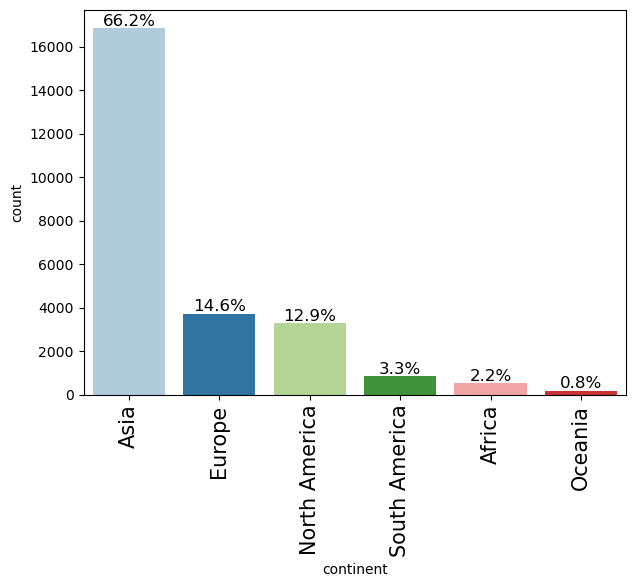

Distribution of categorical column: education_of_employee


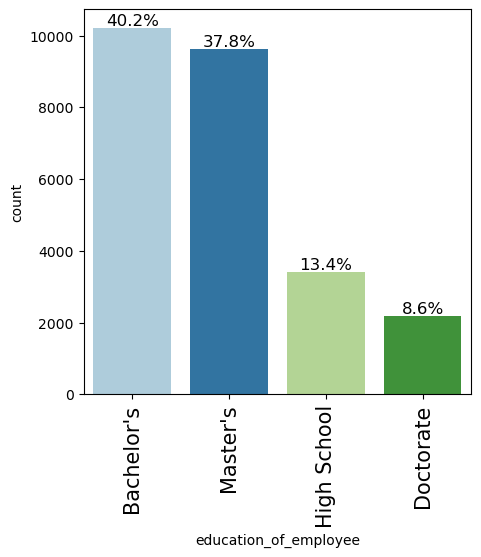

Distribution of categorical column: has_job_experience


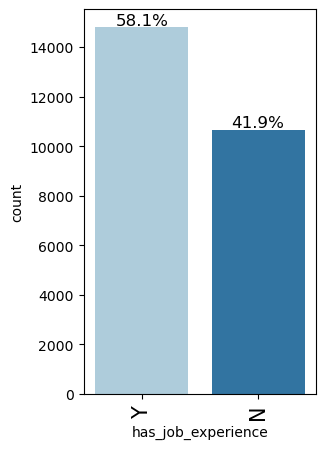

Distribution of categorical column: requires_job_training


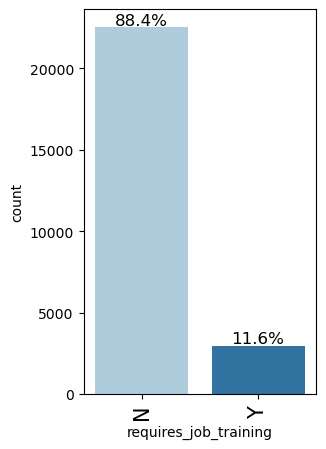

Distribution of categorical column: region_of_employment


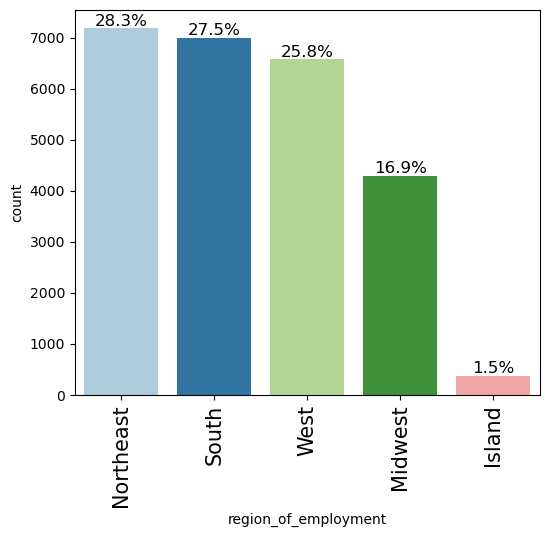

Distribution of categorical column: unit_of_wage


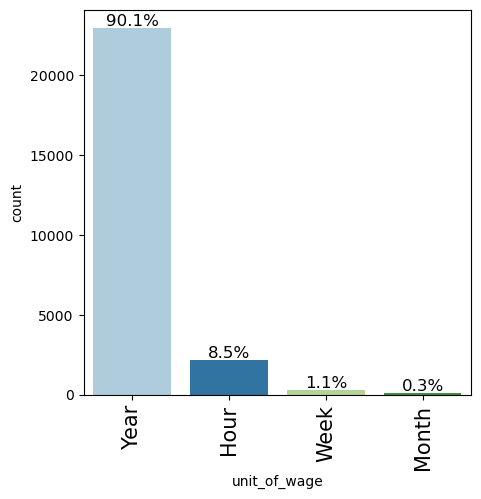

Distribution of categorical column: full_time_position


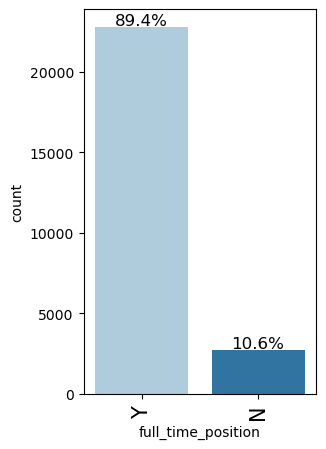

Distribution of categorical column: case_status


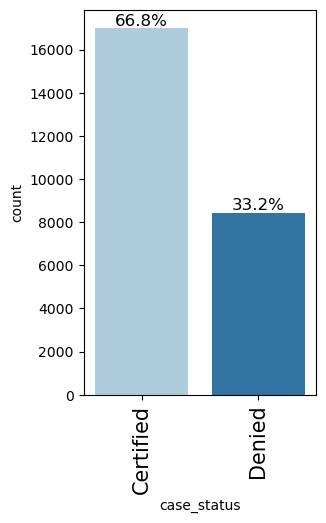

In [76]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
        order = data[feature].value_counts().index
    else:
        plt.figure(figsize=(n + 1, 5))
        order = data[feature].value_counts().index[:n]

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=order,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# Barplots for categorical columns
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        print(f"Distribution of categorical column: {col}")
        labeled_barplot(data_cleaned, col, perc=True, n=None)  # top 5 levels






In [77]:
# Observations for categorical columns:
print("Observations for categorical columns:" \
"\n1. case_id is a sequence and is unique for each row, so it will not be useful for modeling." \
"\n2. Continent Asia has the highest number of applicants about 66%, which is 300% more than the next highest continent Europe at about 14%  " \
"\n3. education_of_employee  most applicants have some form of higher education bachelors, Master's or Doctorate this data makes up almost 80% of the data " \
"\n4. has_job_experience most of the applicants have job experience about 58% " \
"\n5. has_job_training most of the applicants have job training about 70% " \
"\n6. region_of_employment applicants are close to evenly distributed between Northeast , south, west. Midwest and island had lower applicants compared to other regions." \
"\n7. unit_of_age most applicants were paid annualy about 90% " \
"\n8. full_time_position most applicants were for full time position about 90%" \
"\n9. case_status is the dependent variable  about 66% of the applicants were certified" \
)

Observations for categorical columns:
1. case_id is a sequence and is unique for each row, so it will not be useful for modeling.
2. Continent Asia has the highest number of applicants about 66%, which is 300% more than the next highest continent Europe at about 14%  
3. education_of_employee  most applicants have some form of higher education bachelors, Master's or Doctorate this data makes up almost 80% of the data 
4. has_job_experience most of the applicants have job experience about 58% 
5. has_job_training most of the applicants have job training about 70% 
6. region_of_employment applicants are close to evenly distributed between Northeast , south, west. Midwest and island had lower applicants compared to other regions.
7. unit_of_age most applicants were paid annualy about 90% 
8. full_time_position most applicants were for full time position about 90%
9. case_status is the dependent variable  about 66% of the applicants were certified


#### Observations on education of employee

In [78]:
print("education_of_employee  most applicants have some form of higher education degree like  bachelors 40%, Master's 37% or Doctorate 8.% this data makes up little more than 80% of the data " \
      "about 13% of the applicant have high school" \
      )

education_of_employee  most applicants have some form of higher education degree like  bachelors 40%, Master's 37% or Doctorate 8.% this data makes up little more than 80% of the data about 13% of the applicant have high school


#### Observations on region of employment

In [79]:
print ("applicants are almost evenly distributed between Northeast,south and west. Regions Midwest and island had lower applicants compared to other regions." \
      "about 1.5% of the applicants are from the island region" \
      "from the data Northeast,south and west are more prefered regions by the applicants " \
      )

applicants are almost evenly distributed between Northeast,south and west. Regions Midwest and island had lower applicants compared to other regions.about 1.5% of the applicants are from the island regionfrom the data Northeast,south and west are more prefered regions by the applicants 


#### Observations on job experience

In [80]:
print ("More than half 'about 58%' of the applicats are experienced ." )

More than half 'about 58%' of the applicats are experienced .


#### Observations on case status

In [81]:
print("case status is the dependent variable about 66% of the applicants were certified")

case status is the dependent variable about 66% of the applicants were certified


### Bivariate Analysis

**Creating functions that will help us with further analysis.**

Distribution of numerical column: no_of_employees w.r.t target column: case_status


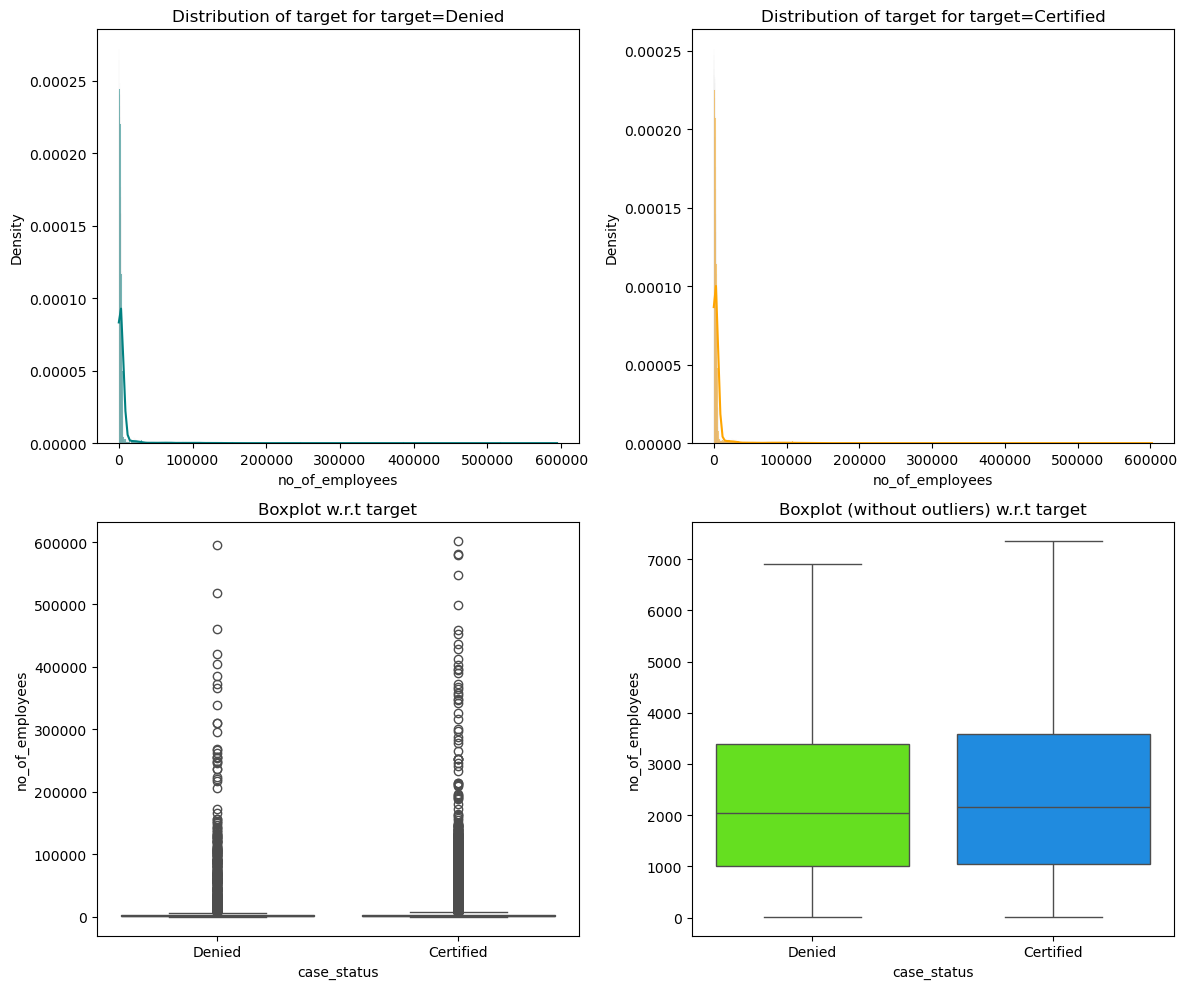

Distribution of numerical column: yr_of_estab w.r.t target column: case_status


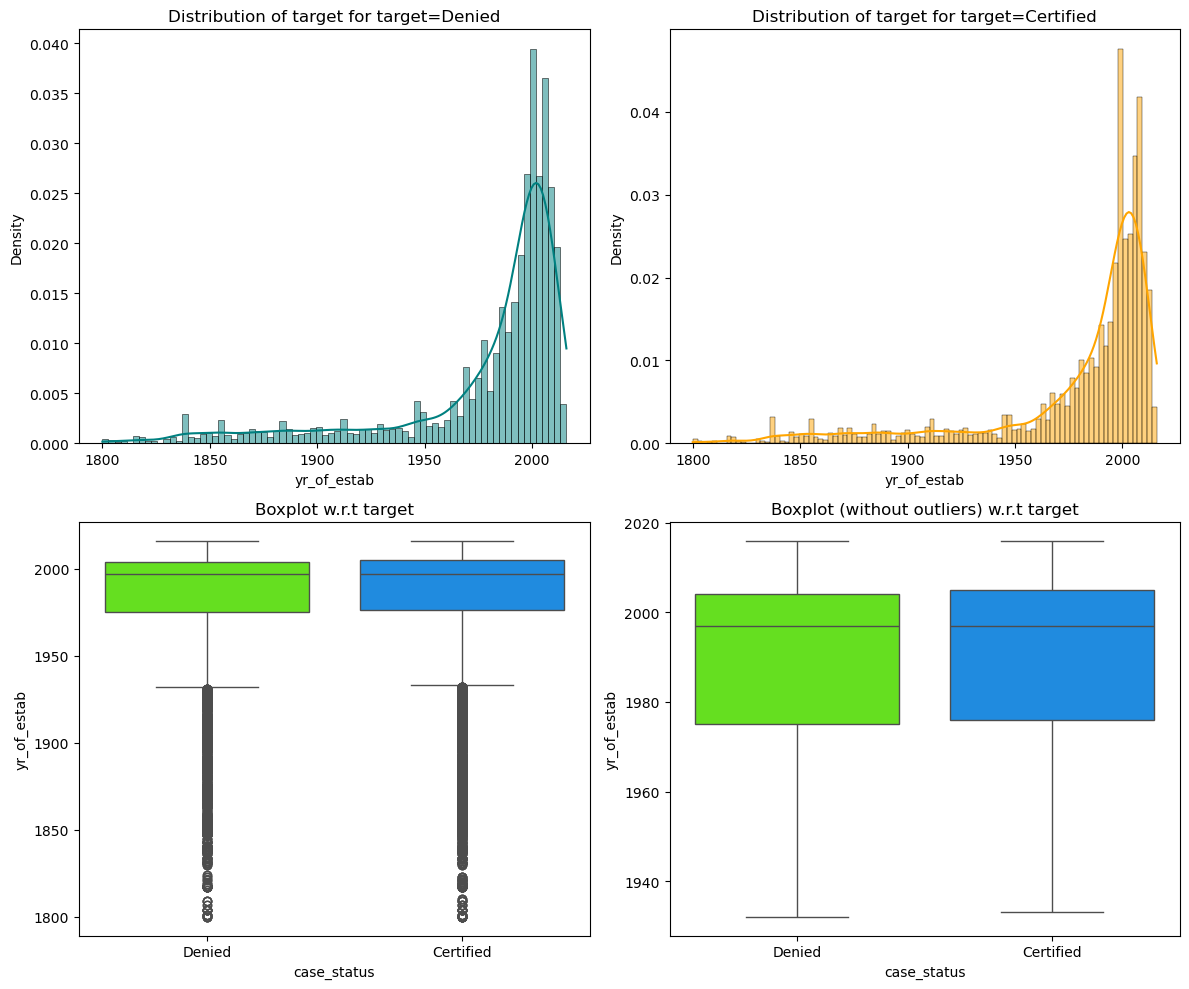

Distribution of numerical column: prevailing_wage w.r.t target column: case_status


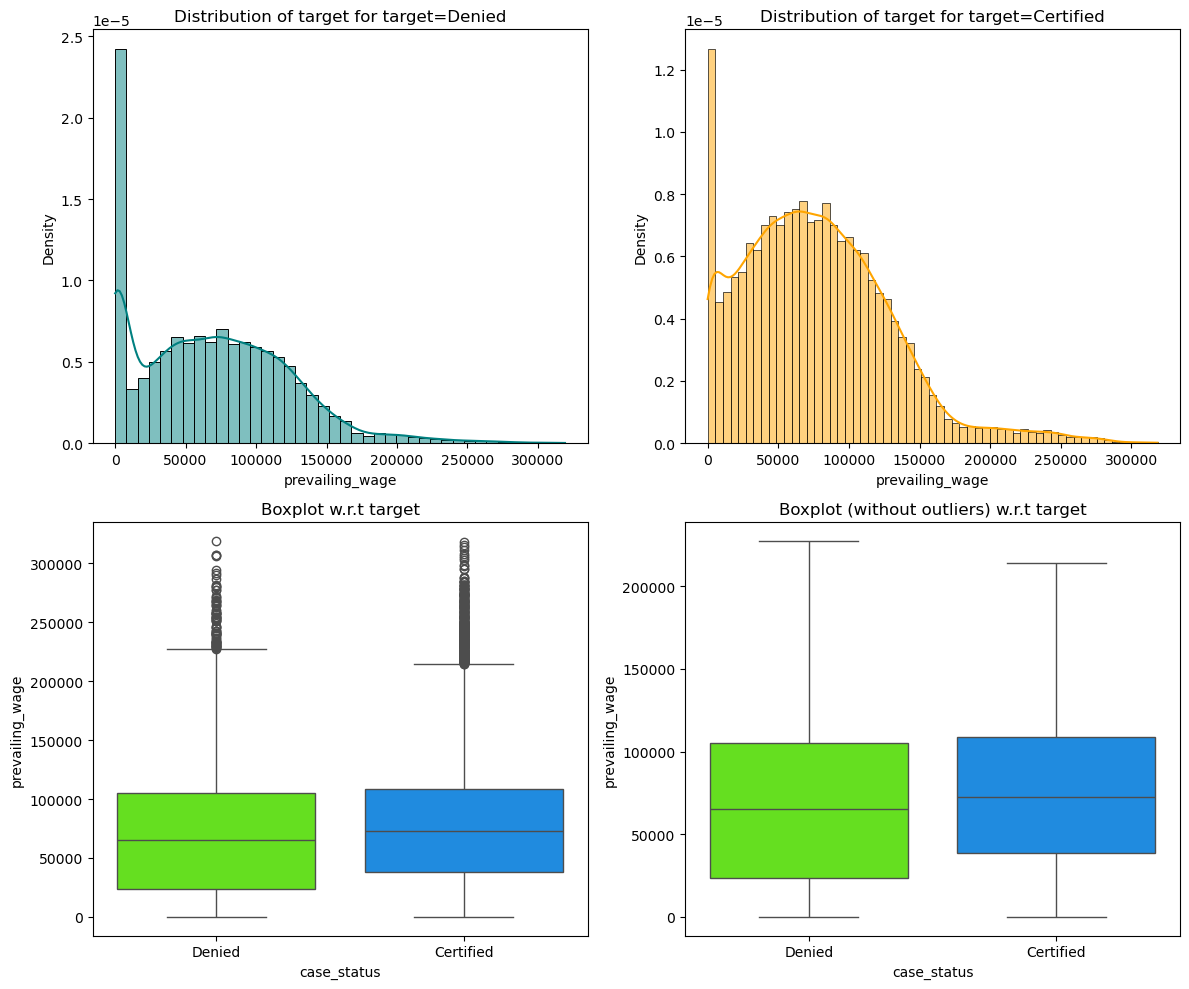

In [82]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


target_col = 'case_status'
for col in data_cleaned.columns:
    if data_cleaned[col].dtype in ['int64', 'float64']:
        print(f"Distribution of numerical column: {col} w.r.t target column: {target_col}")
        distribution_plot_wrt_target(data_cleaned, col, target_col)  # distribution wrt target  



Stacked barplot of categorical column: case_id w.r.t target column: case_status
case_status  Certified  Denied    All
case_id                              
All              17001    8446  25447
EZYV21776            0       1      1
EZYV21718            0       1      1
EZYV21719            0       1      1
EZYV2172             0       1      1
...                ...     ...    ...
EZYV13744            1       0      1
EZYV13743            1       0      1
EZYV21731            1       0      1
EZYV21732            1       0      1
EZYV21458            1       0      1

[25448 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


ValueError: Image size of 2545200x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2.5452e+06x500 with 1 Axes>

Stacked barplot of categorical column: continent w.r.t target column: case_status
case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


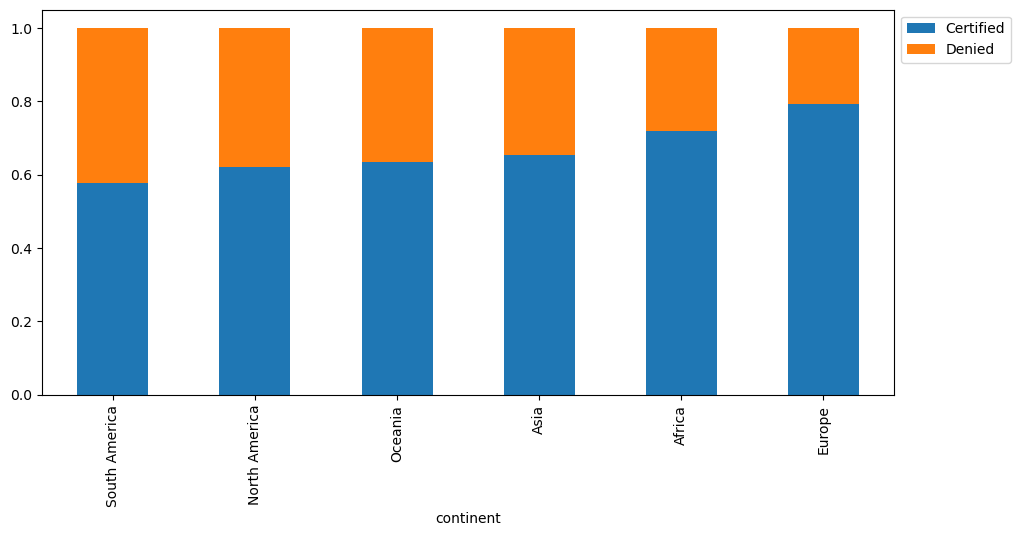

Stacked barplot of categorical column: education_of_employee w.r.t target column: case_status
case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


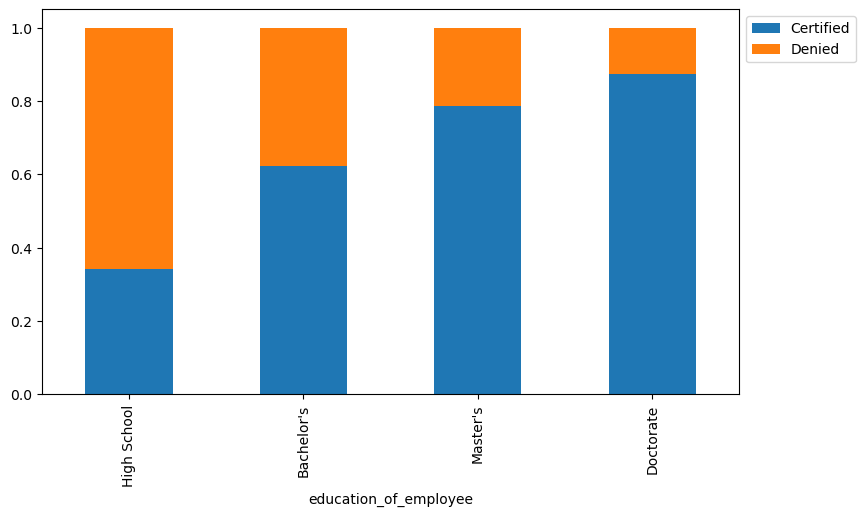

Stacked barplot of categorical column: has_job_experience w.r.t target column: case_status
case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


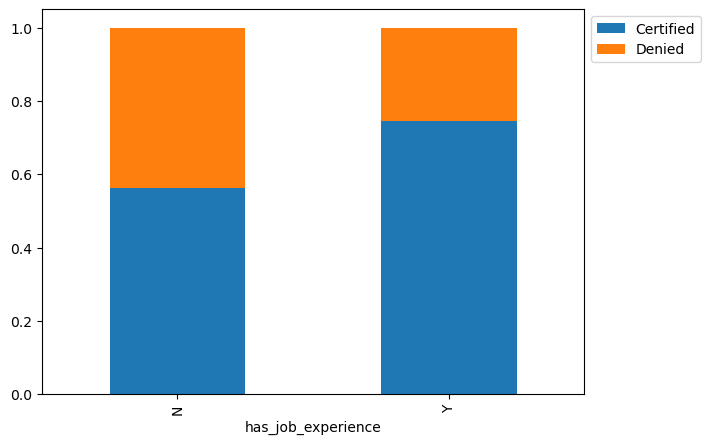

Stacked barplot of categorical column: requires_job_training w.r.t target column: case_status
case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


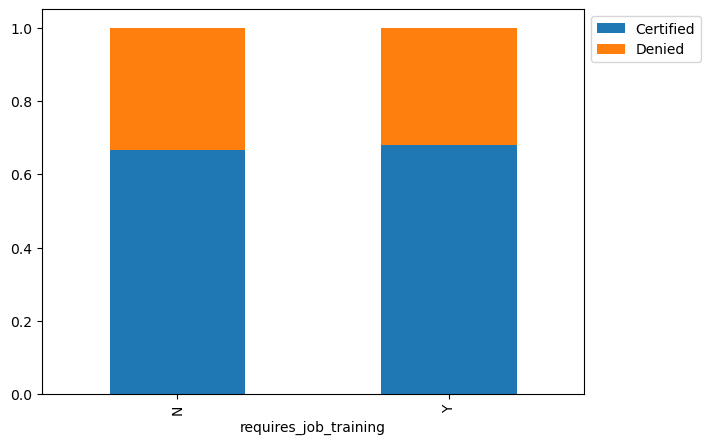

Stacked barplot of categorical column: region_of_employment w.r.t target column: case_status
case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


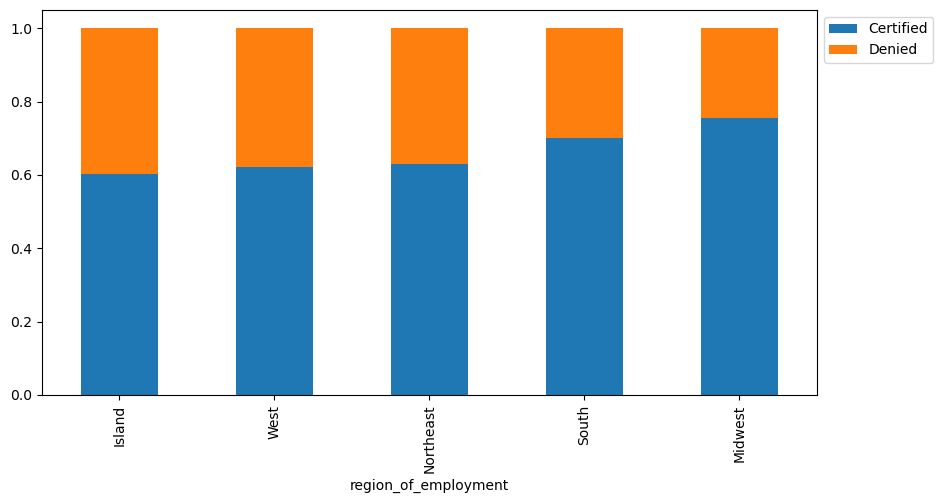

Stacked barplot of categorical column: unit_of_wage w.r.t target column: case_status
case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


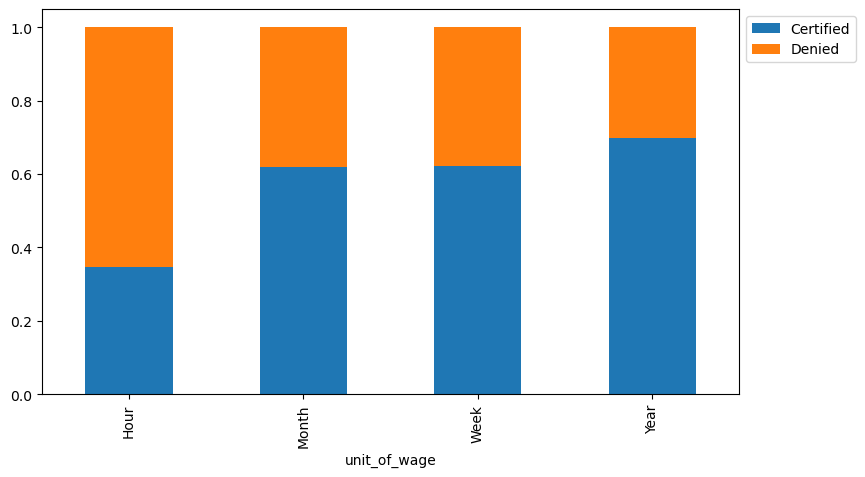

Stacked barplot of categorical column: full_time_position w.r.t target column: case_status
case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


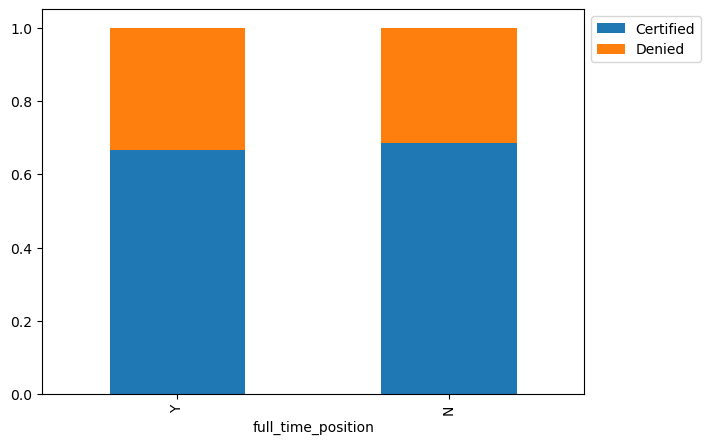

Stacked barplot of categorical column: case_status w.r.t target column: case_status
case_status  Certified  Denied    All
case_status                          
Denied               0    8446   8446
All              17001    8446  25447
Certified        17001       0  17001
------------------------------------------------------------------------------------------------------------------------


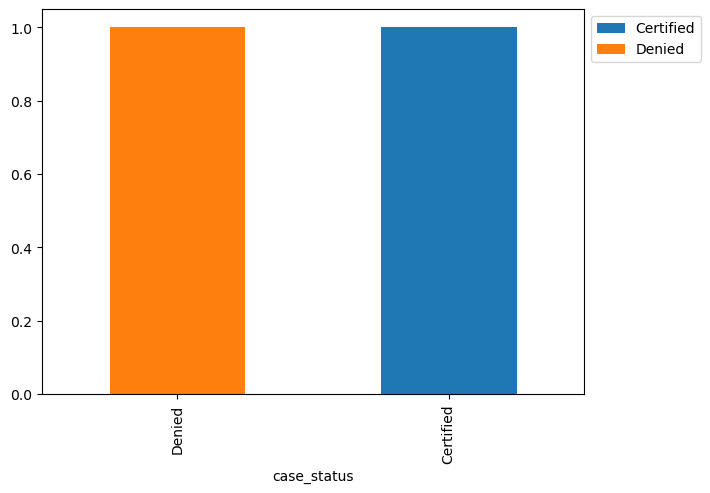

In [83]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


    target_col = 'case_status'
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        print(f"Stacked barplot of categorical column: {col} w.r.t target column: {target_col}")
        stacked_barplot(data_cleaned, col, target_col)  # stacked barplot wrt target

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

In [84]:
print("Higher education Levels like Doctorate and Masters have higher certification rates compared to lower education levels like Bachelors and High School" \
      "\n Doctorate certification is almost 50% higher than High School"\
      "\n"
      )

Higher education Levels like Doctorate and Masters have higher certification rates compared to lower education levels like Bachelors and High School
 Doctorate certification is almost 50% higher than High School



#### How does visa status vary across different continents?

In [85]:
print("Europe has the highest rate of approval total applicants 3727, 2953 got approved which is about 79% approval rate."/
       "\n Asia has the highest number of applicants and third highest number approval rate which is little over 60%.")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

In [ ]:
print("Yes, having prior job experience has a higher rate of approval about 70% compared to those without experience about 60%")

#### Is the prevailing wage consistent across all regions of the US?

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

In [ ]:
print ("Hours wages are less likely to get certified compared to monthly , weekly and annualy wages" )

## Data Pre-processing

### Outlier Check

### Data Preparation for modeling

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

### Model Building with Oversampled data

### Model Building with Undersampled data

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

## Model Performance Summary and Final Model Selection

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___